In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path
import numpy as np

from utils import cluster
from utils import plot_utils
from utils.config import TrackerConfig

In [2]:
config = TrackerConfig()
nc_folder = config.paths.nc_folder
stdev_file = config.files.stdev_file
stdev_mask = xr.open_dataarray(f"{nc_folder}/{stdev_file}")

In [ ]:
land_sea_mask = xr.open_dataarray(r"data\IMERG_land_sea_mask.nc")

land_sea_mask = land_sea_mask.assign_coords(
lon=(((land_sea_mask.lon + 180) % 360) - 180)
).sortby('lon').rename({'lat': 'latitude', 'lon': 'longitude'})

land_sea_mask = land_sea_mask.interp(
latitude=stdev_mask.latitude,
longitude=stdev_mask.longitude,
method='nearest'  # or 'nearest', 'cubic'
)
land_sea_mask = land_sea_mask>=100


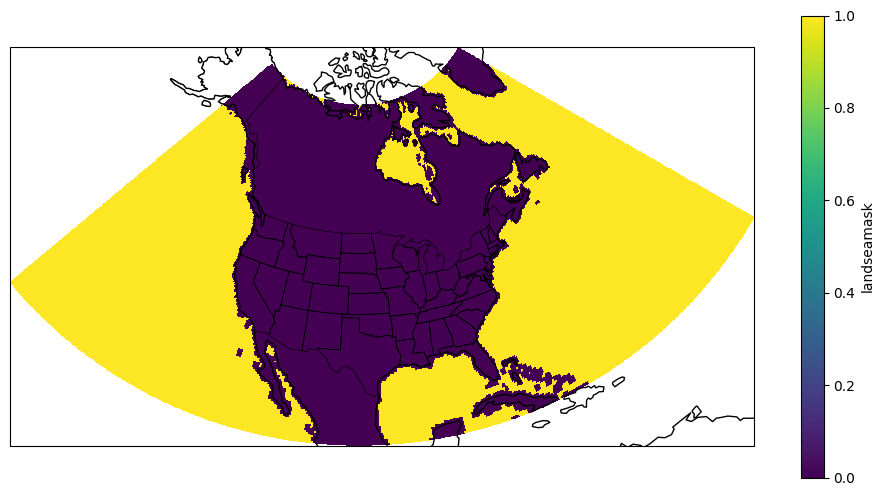

In [178]:
plt.figure(figsize=(12, 6))
axes = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-100))
land_sea_mask.plot(transform=ccrs.PlateCarree())
axes.coastlines()
axes.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)

In [189]:
#labrador_sea_lat_min = 47.38597222  # degrees N
#labrador_sea_lat_max = 60.39875  # degrees N  
#labrador_sea_lon_min = -64.30594444 # degrees W
#labrador_sea_lon_max = -43.67488889 # degrees W
#degree minute second converter for labrador sea
#d=np.array([47,64,60,43])
#m=np.array([23,18,23,40])
#s=np.array([9.5,21.4,55.5,29.6])
#d+m/60 + s/3600

labrador_sea_mask = land_sea_mask
labrador_sea_mask = labrador_sea_mask.sel(latitude=slice(90,47),longitude=slice(-70,0))
labrador_sea_mask = (
    (land_sea_mask.latitude >= np.min(labrador_sea_mask.latitude)) & 
    (land_sea_mask.latitude <= np.max(labrador_sea_mask.latitude)) &
    (land_sea_mask.longitude >= np.min(labrador_sea_mask.longitude)) & 
    (land_sea_mask.longitude <= np.max(labrador_sea_mask.longitude))
)
labrador_sea_mask = labrador_sea_mask.where(land_sea_mask)
labrador_sea_mask = labrador_sea_mask==1

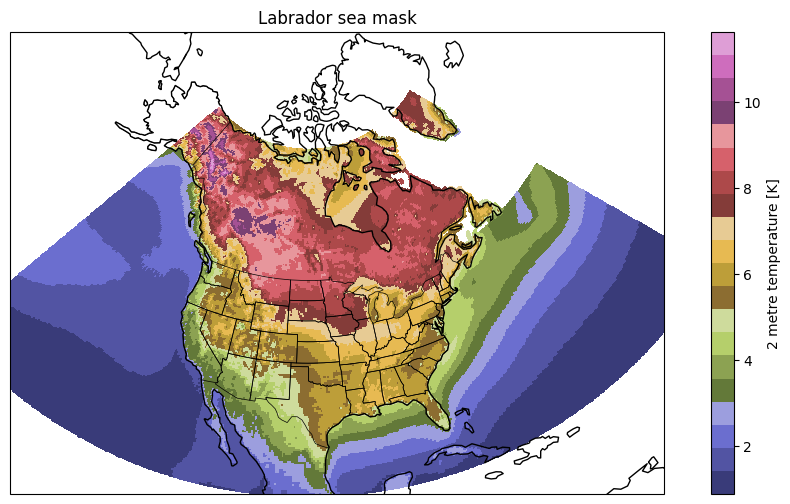

In [190]:
#Labrador sea mask
plt.figure(figsize=(12, 6))
axes = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-100))
stdev_mask.where(~labrador_sea_mask).plot(transform=ccrs.PlateCarree(),cmap='tab20b')
axes.coastlines()
axes.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)
axes.set_extent((-140, -50, 20, 90),ccrs.PlateCarree())
plt.title("Labrador sea mask");

In [191]:
# Define Greenland boundaries (approximate)
    # Define Greenland boundaries (approximate)
#    greenland_lat_min = 59  # degrees N
#    greenland_lat_max = 84  # degrees N  
#    greenland_lon_min = -75 # degrees W
#    greenland_lon_max = -10 # degrees W

greenland_lat_min = 52  # degrees N
greenland_lat_max = 84  # degrees N  
greenland_lon_min = -55 # degrees W
greenland_lon_max = -10 # degrees W

# Create Greenland mask
greenland_mask = (
    (land_sea_mask.latitude >= greenland_lat_min) & 
    (land_sea_mask.latitude <= greenland_lat_max) &
    (land_sea_mask.longitude >= greenland_lon_min) & 
    (land_sea_mask.longitude <= greenland_lon_max)
)

Text(0.5, 1.0, 'Greenland mask')

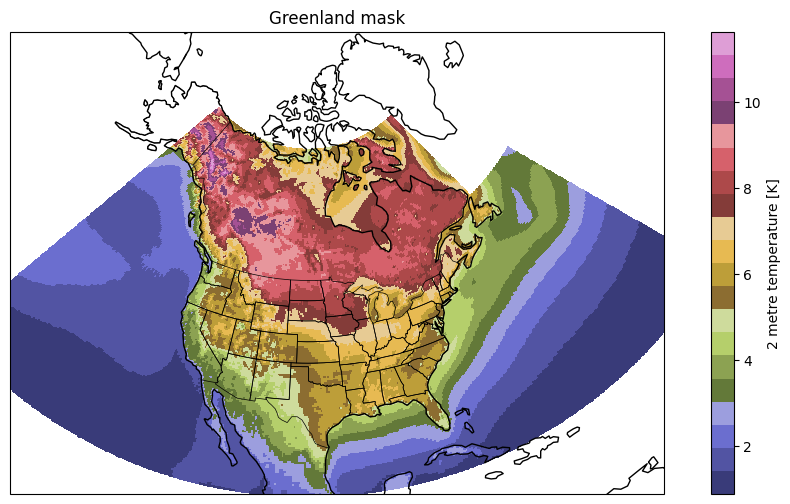

In [193]:
#Greenland mask
plt.figure(figsize=(12, 6))
axes = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-100))
stdev_mask.where(~greenland_mask).plot(transform=ccrs.PlateCarree(),cmap='tab20b')
axes.coastlines()
axes.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)
axes.set_extent((-140, -50, 20, 90),ccrs.PlateCarree())
plt.title("Greenland mask")

In [ ]:
#Save masks

land_sea_mask.to_netcdf("data/land_sea_mask_res_025.nc")
greenland_mask.to_netcdf("data/greenland_mask_res_025.nc")
labrador_sea_mask.to_netcdf("data/labrador_sea_mask_res_025.nc")

Text(0.5, 1.0, 'Greenland mask')

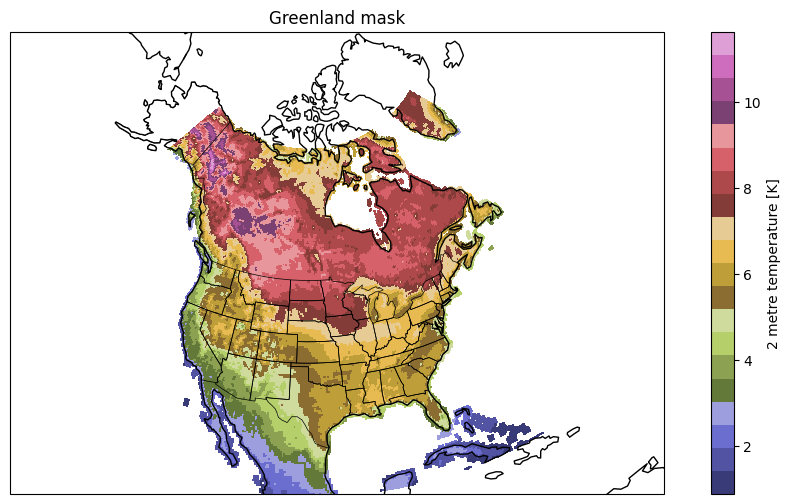

In [198]:
mask = xr.open_dataarray(r"data\land_sea_mask_res_025.nc")
#Greenland mask
plt.figure(figsize=(12, 6))
axes = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-100))
stdev_mask.where(~mask).plot(transform=ccrs.PlateCarree(),cmap='tab20b')
axes.coastlines()
axes.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)
axes.set_extent((-140, -50, 20, 90),ccrs.PlateCarree())
plt.title("Greenland mask")